# Project 1: Credit Card Fraud Detection with TensorFlow

## Team members:

## Description:

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.
Inspiration

Identify fraudulent credit card transactions.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

# 1. Importing Labraries

In [246]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
from statsmodels.graphics.gofplots import qqplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support, classification_report, auc, roc_curve
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from pylab import rcParams
import sys
from sklearn.utils import resample
from sklearn.preprocessing import RobustScaler

In [22]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [430]:
import tensorflow as tf
from keras.models import Model, load_model, Sequential
from keras.layers import Input, Dense, Activation
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from keras.optimizers import RMSprop
from imblearn.over_sampling import SMOTE

In [429]:
pip install imblearn

     |████████████████████████████████| 174kB 4.3MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


# 2. Exploratory Data Analysis

## Conclusion of EDA

### 2.1 Datasize and variable type

In [248]:
#import the data
df = pd.read_csv("/Users/jialingzhu/Downloads/S1 Machine Learning Victor Duarte/Project//creditcard.csv")

In [250]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_Robust,Time_Norm
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1.783274,0.000000
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.269825,0.000000
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,4.983721,0.000006
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1.418291,0.000006
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.670579,0.000012


In [14]:
print("The size of original data is:")
df.shape

The size of original data is:


(284807, 31)

In [13]:
print("The number of null values is:")
df.isnull().values.sum()

The number of null values is:


0

In [139]:
ncol=df.shape[1]
nrow=df.shape[0]
#print(nrow,ncol)
print("The number of values in each feature:")
type = [0]*3
colCounts = []

for col in range(ncol):
    for row in range(nrow):
        try:
            a = float(df.iloc[row,col])
            if isinstance(a, float):
                type[0] += 1
        except ValueError:
            if len(df.iloc[row,col]) > 0:
                type[1] += 1
            else:
                type[2] += 1
    colCounts.append(type)
    type = [0]*3
sys.stdout.write("Col#" + '\t' + "Number" + '\t' + "Strings" + '\t ' + "Other\n")
iCol = 0
for types in colCounts:
    sys.stdout.write(str(iCol) + '\t' + str(types[0]) + '\t' + str(types[1]) + '\t' + str(types[2]) + '\n')
    iCol += 1
    sys.stdout.write('\n')

The number of values in each feature:
Col#	Number	Strings	 Other
0	284807	0	0

1	284807	0	0

2	284807	0	0

3	284807	0	0

4	284807	0	0

5	284807	0	0

6	284807	0	0

7	284807	0	0

8	284807	0	0

9	284807	0	0

10	284807	0	0

11	284807	0	0

12	284807	0	0

13	284807	0	0

14	284807	0	0

15	284807	0	0

16	284807	0	0

17	284807	0	0

18	284807	0	0

19	284807	0	0

20	284807	0	0

21	284807	0	0

22	284807	0	0

23	284807	0	0

24	284807	0	0

25	284807	0	0

26	284807	0	0

27	284807	0	0

28	284807	0	0

29	284807	0	0

30	284807	0	0



### 2.2 Unbalance  Size

In [144]:
LABELS = ["Normal","Fraud"]

In [145]:
df_normal = df[df['Class']==0]
df_fraud = df[df['Class']==1]
print("The data size of class normal is")
print(df_normal.shape)
print("The data size of class fraud is")
print(df_fraud.shape)

The data size of class normal is
(284315, 31)
The data size of class fraud is
(492, 31)


In [146]:
print("The fraud reconds is " +str(492/(284315+492)*100) +" percentage of total records in dataset")

The fraud reconds is 0.1727485630620034 percentage of total records in dataset


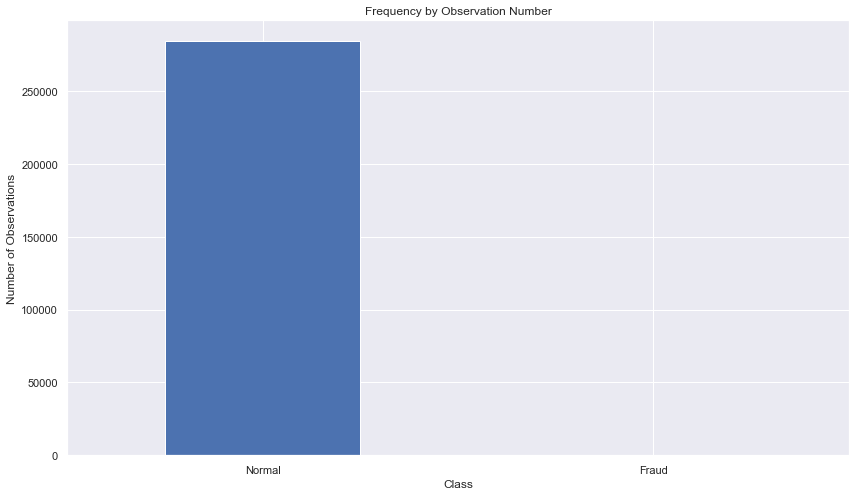

In [148]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0, figsize=(14, 8))
plt.xticks(range(2), LABELS)
plt.title("Frequency by Observation Number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

### 2.3 Statistics Summaries

### 2.3.1 Whole Data Statistics Summaries

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### 2.3.2 'Fraud' Data Statistics Summaries

In [122]:
df_fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


### 2.4 Correlation between features and classes

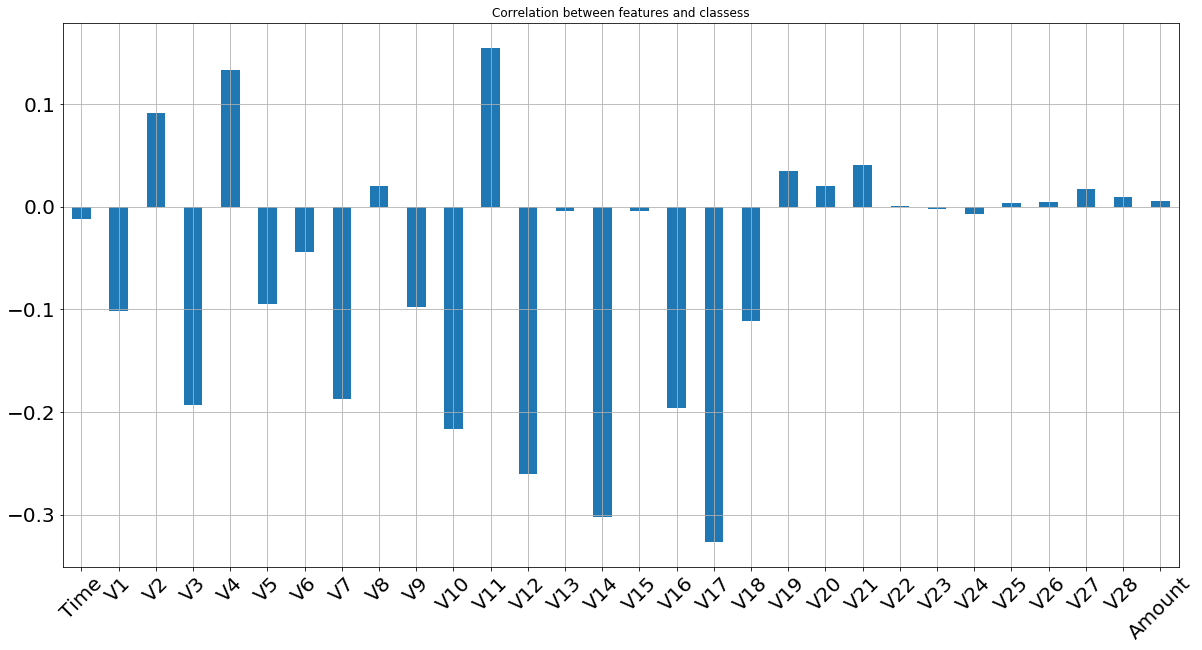

In [18]:
df2 = df.drop(columns = ['Class'])
df2.corrwith(df.Class).plot.bar(
        figsize = (20, 10), title = "Correlation between features and classess", fontsize = 20,
        rot = 45, grid = True)

### 2.5 Heatmap

AxesSubplot(0.125,0.1925;0.62x0.62)


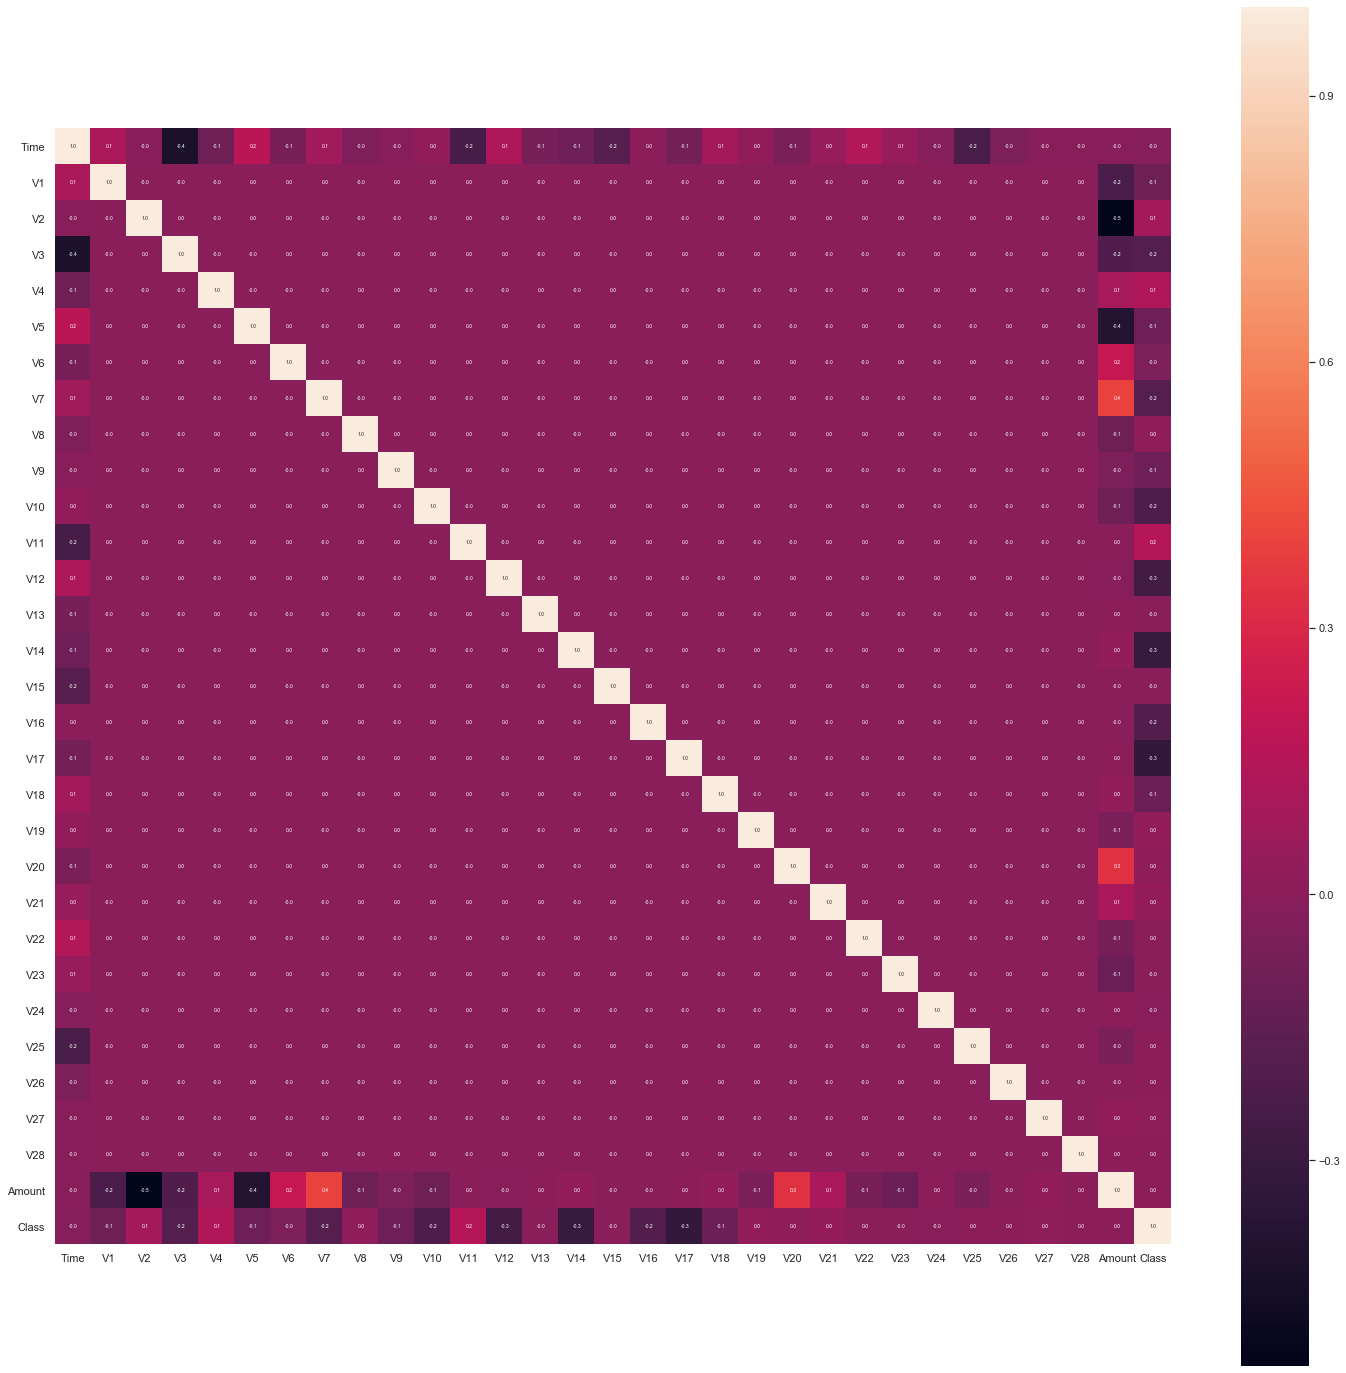

In [27]:
figure(figsize=(25,25))
corrmap=np.corrcoef(df.values.T)
sns.set(font_scale=1)
heatmap=sns.heatmap(corrmap,cbar=True,annot=True,square=True,fmt='.1f',annot_kws={'size':5},yticklabels=df.columns,xticklabels=df.columns)
print(heatmap)

### 2.6 Box plot

### 2.6.1 Box plot for whole dataset

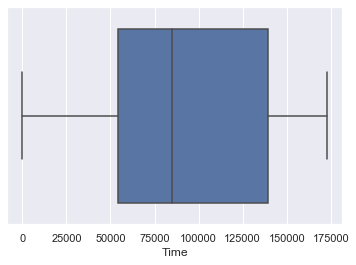

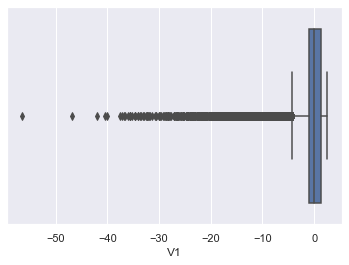

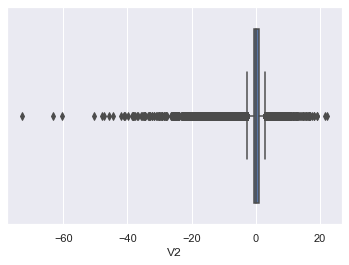

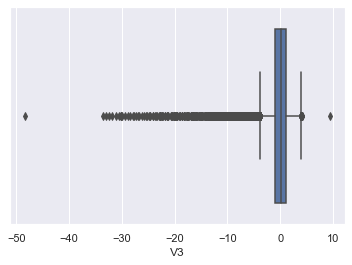

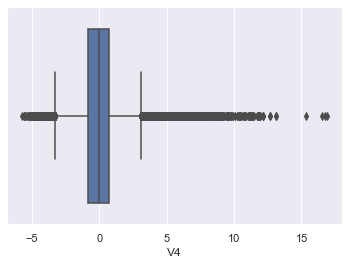

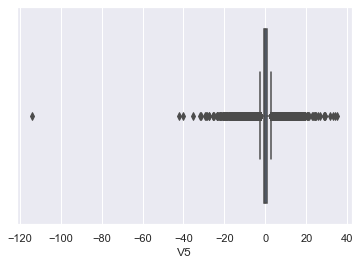

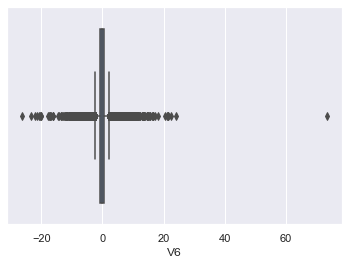

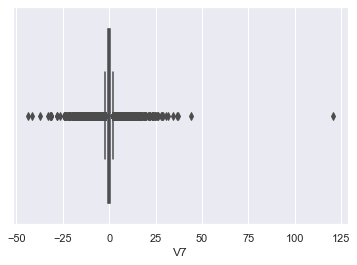

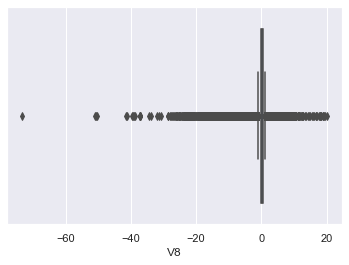

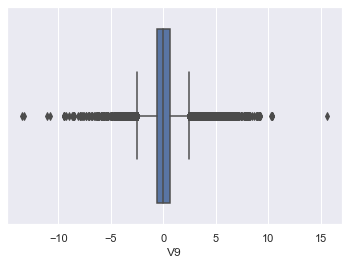

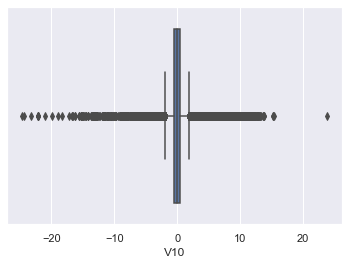

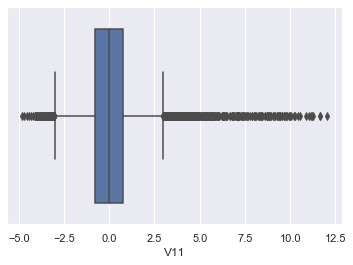

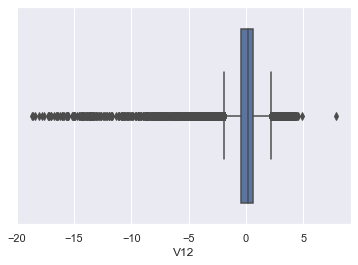

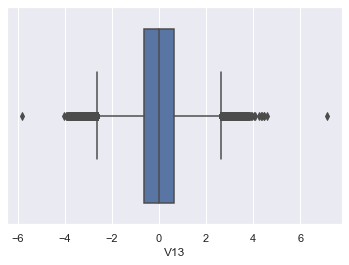

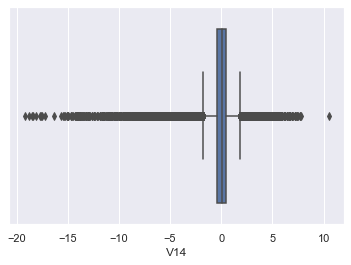

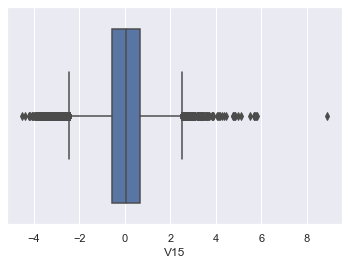

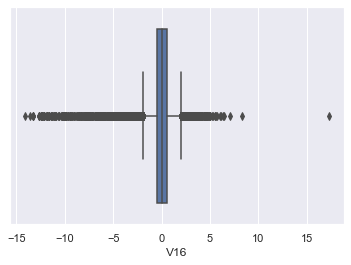

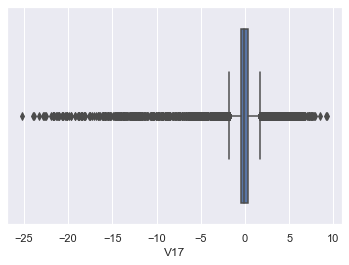

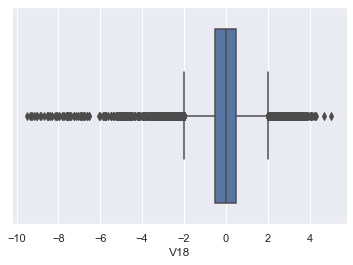

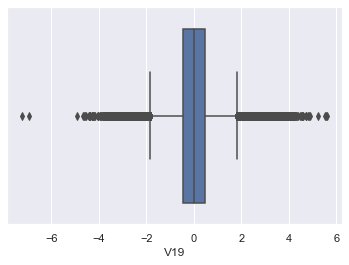

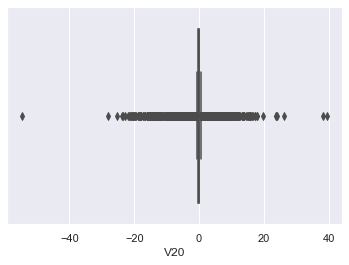

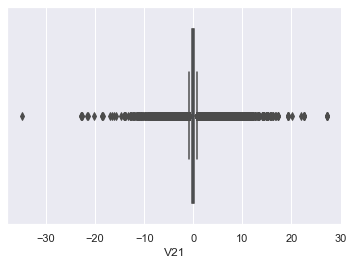

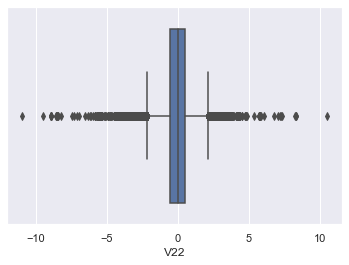

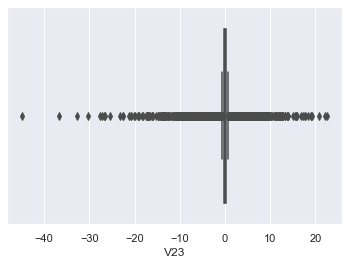

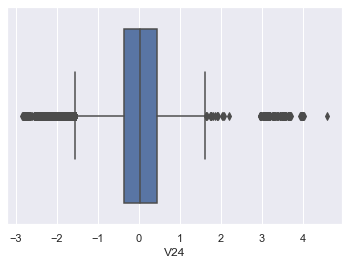

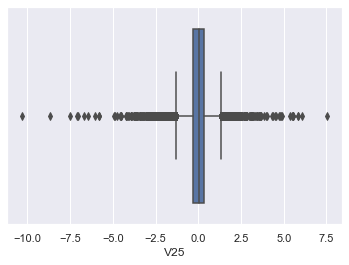

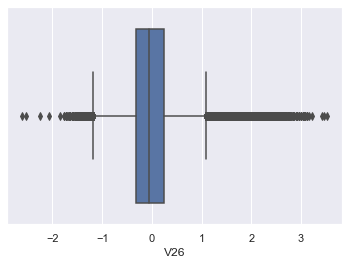

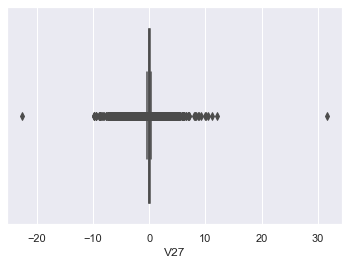

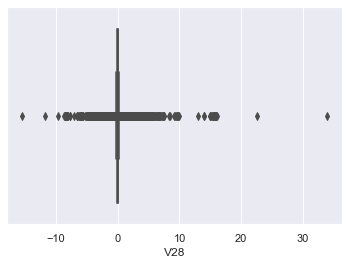

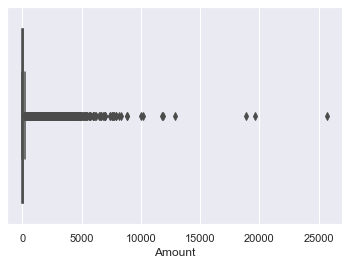

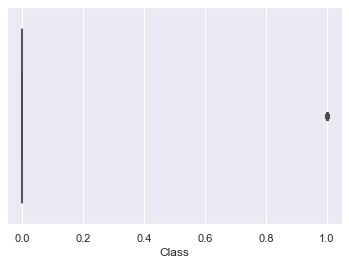

In [73]:
for i in range(df.shape[1]):
    sns.boxplot(df.iloc[:,i])
    plt.show()

### 2.6.2 Box plot for 'Fraud' dataset

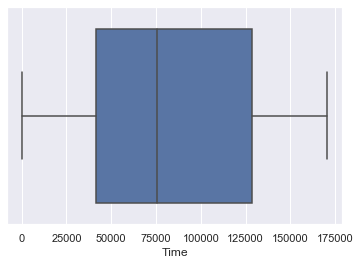

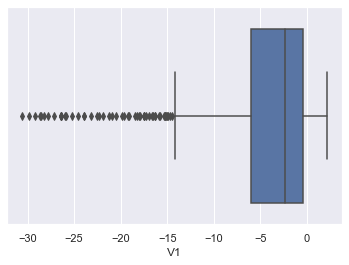

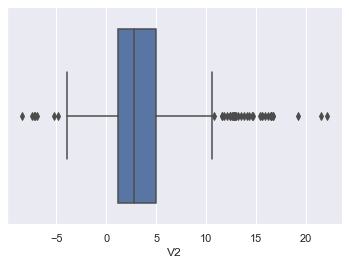

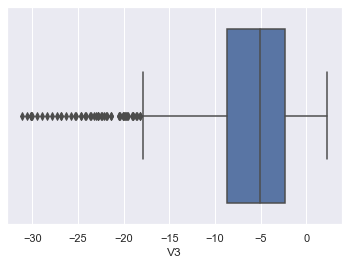

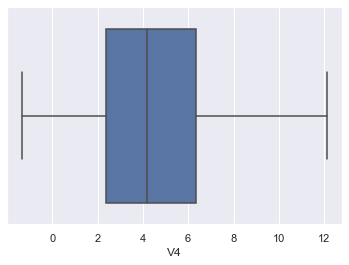

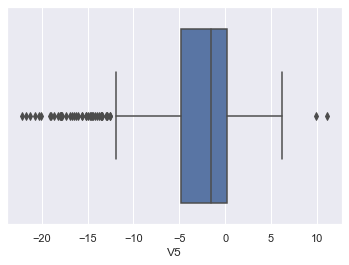

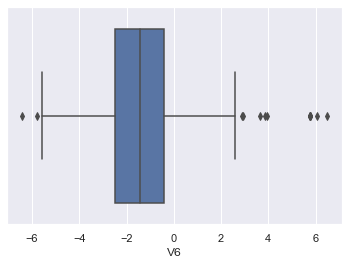

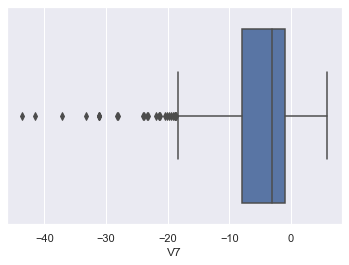

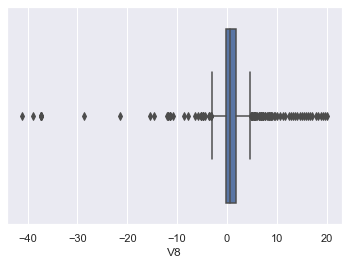

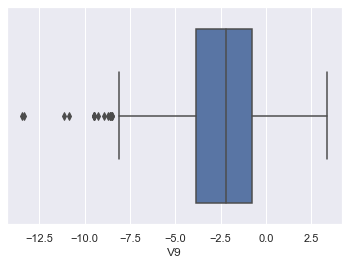

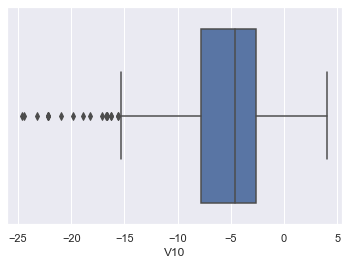

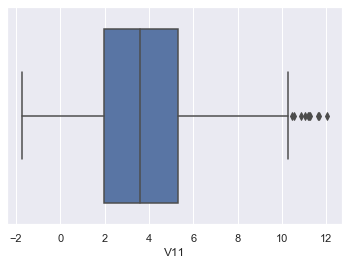

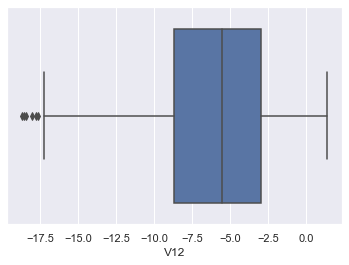

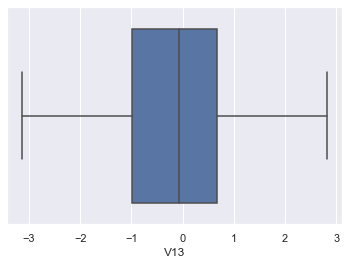

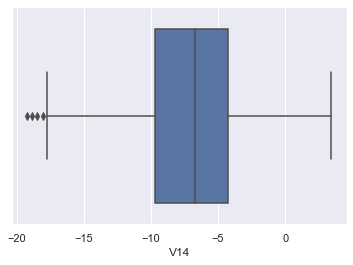

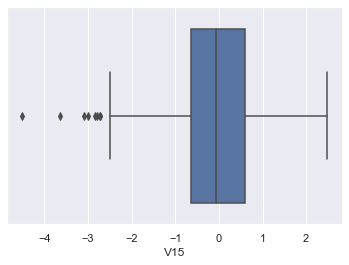

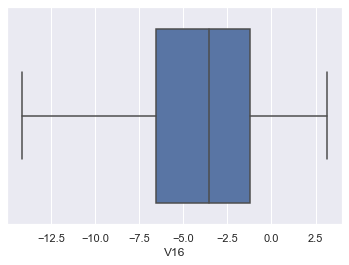

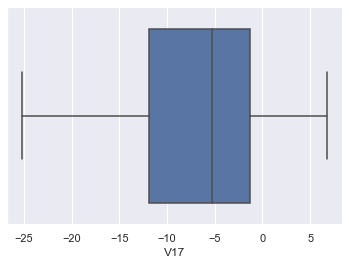

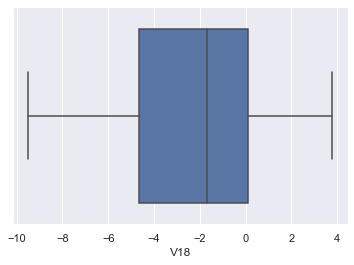

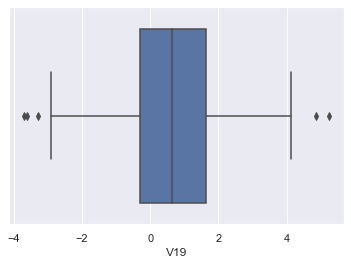

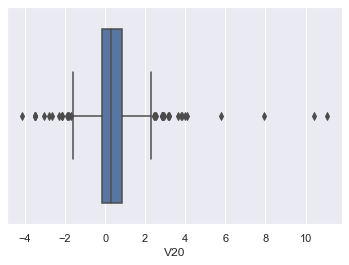

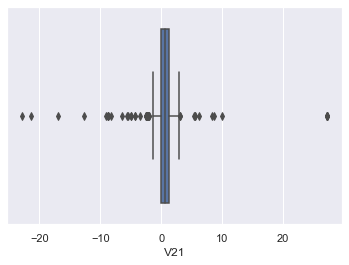

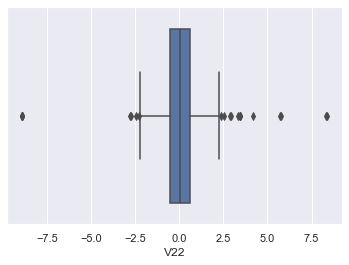

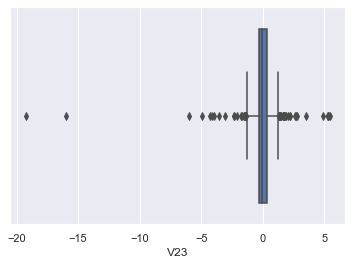

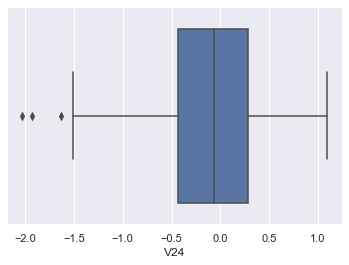

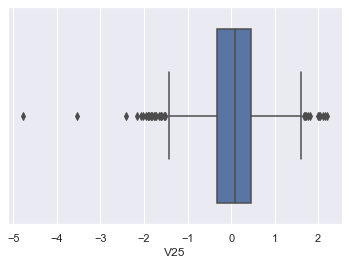

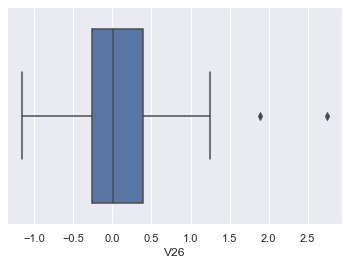

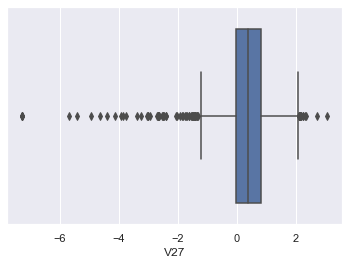

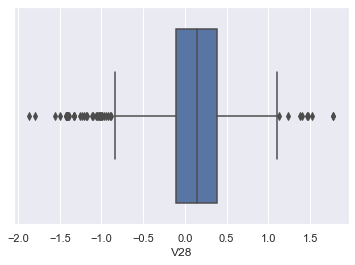

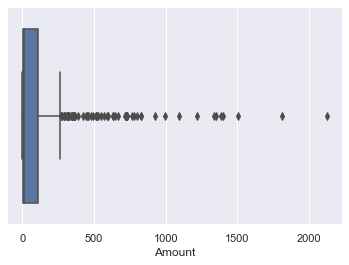

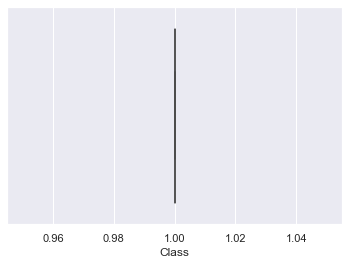

In [128]:
for i in range(df_fraud.shape[1]):
    sns.boxplot(df_fraud.iloc[:,i])
    plt.show()

### 2.7 Q-Q Plot

### 2.7.1 Q-Q Plot for all data

Q-Q plot of feature Time


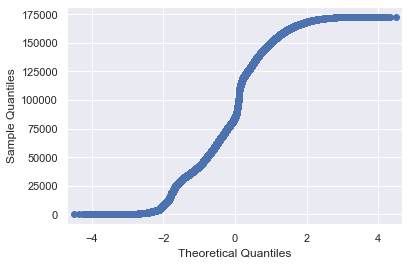

Q-Q plot of feature V1


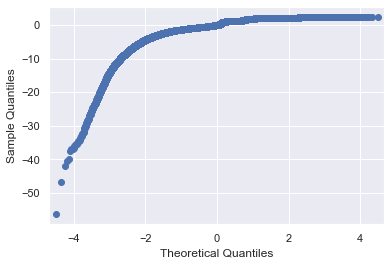

Q-Q plot of feature V2


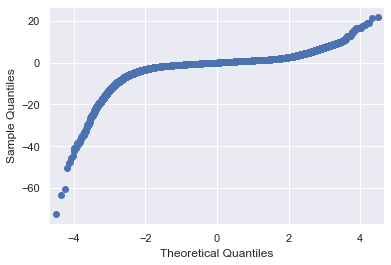

Q-Q plot of feature V3


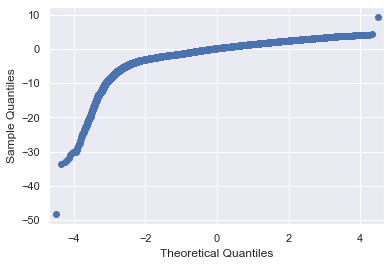

Q-Q plot of feature V4


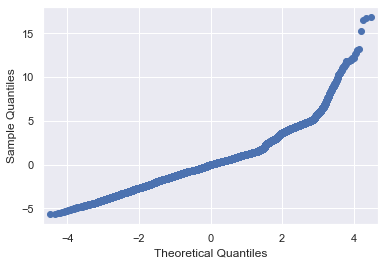

Q-Q plot of feature V5


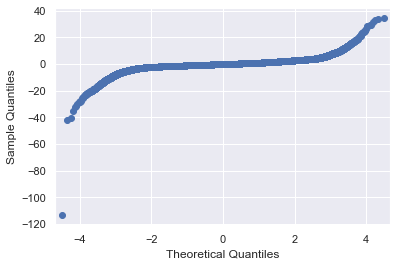

Q-Q plot of feature V6


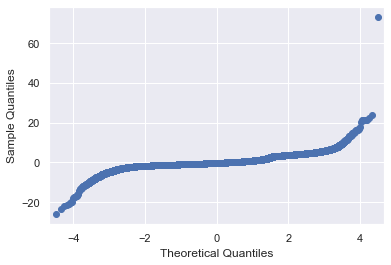

Q-Q plot of feature V7


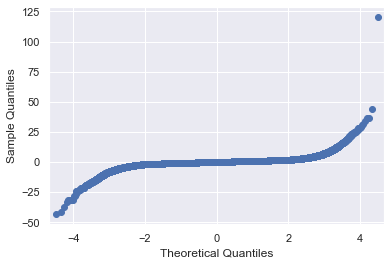

Q-Q plot of feature V8


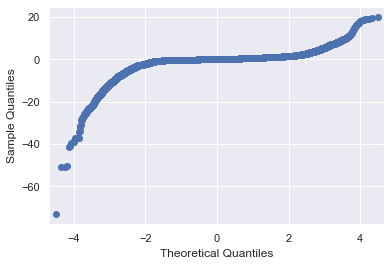

Q-Q plot of feature V9


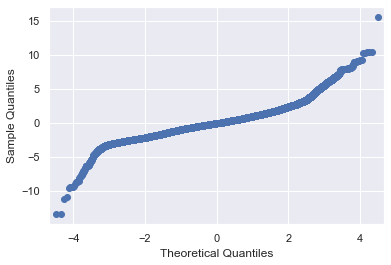

Q-Q plot of feature V10


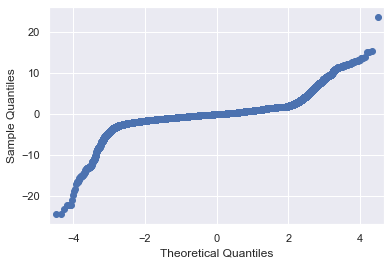

Q-Q plot of feature V11


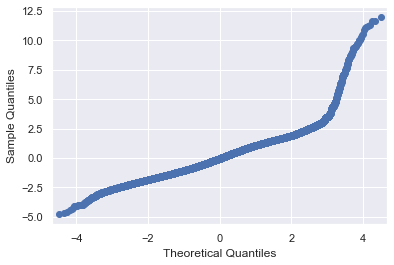

Q-Q plot of feature V12


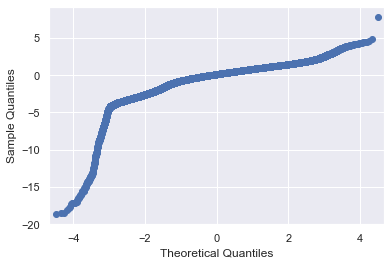

Q-Q plot of feature V13


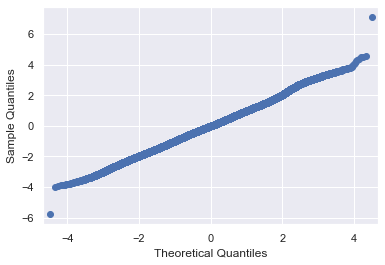

Q-Q plot of feature V14


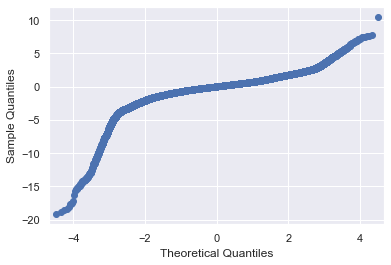

Q-Q plot of feature V15


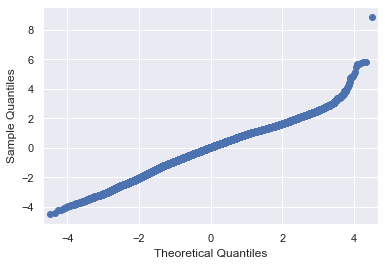

Q-Q plot of feature V16


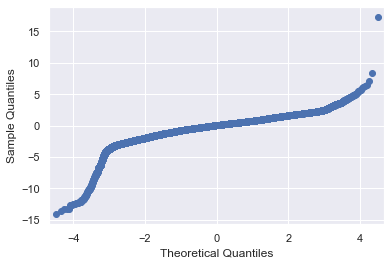

Q-Q plot of feature V17


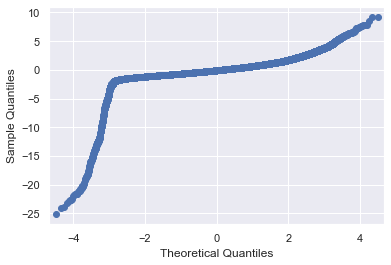

Q-Q plot of feature V18


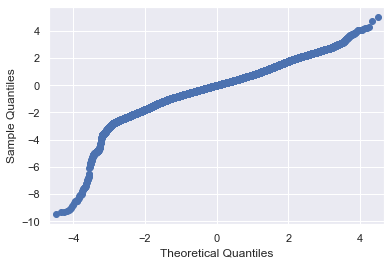

Q-Q plot of feature V19


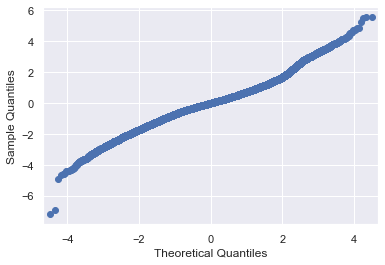

Q-Q plot of feature V20


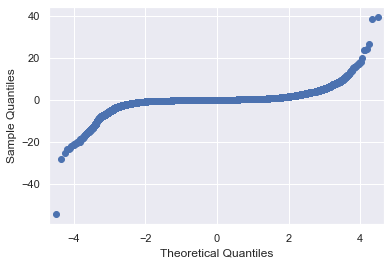

Q-Q plot of feature V21


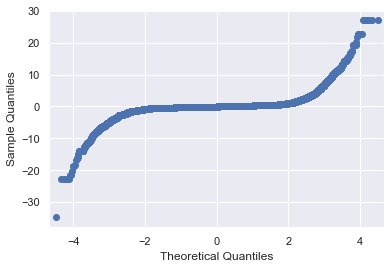

Q-Q plot of feature V22


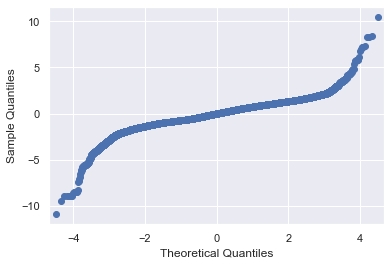

Q-Q plot of feature V23


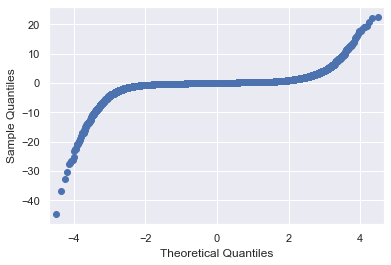

Q-Q plot of feature V24


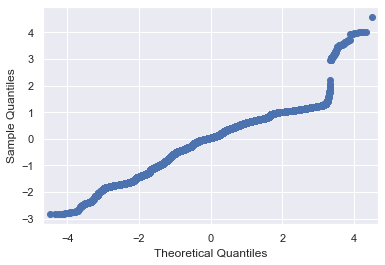

Q-Q plot of feature V25


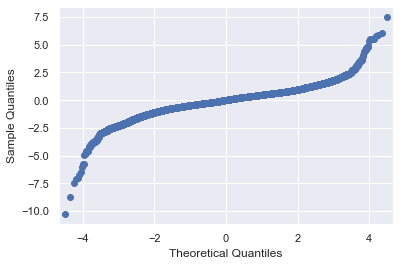

Q-Q plot of feature V26


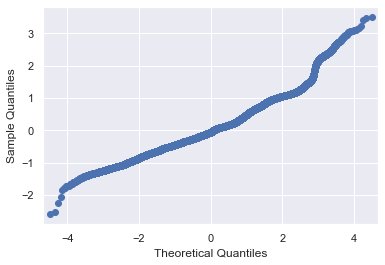

Q-Q plot of feature V27


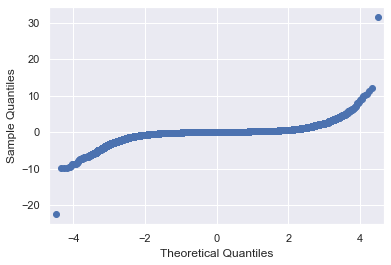

Q-Q plot of feature V28


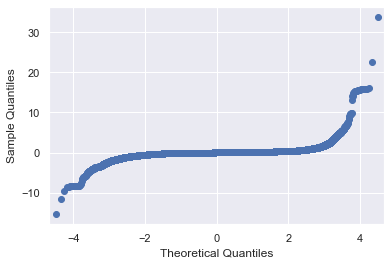

Q-Q plot of feature Amount


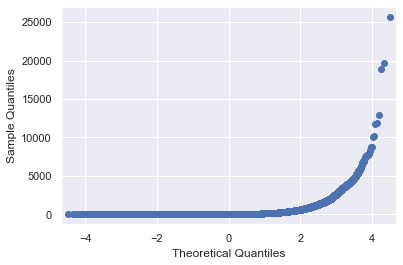

Q-Q plot of feature Class


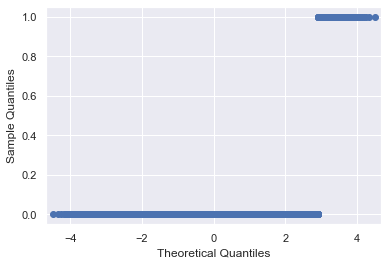

In [149]:
for i in range(df.shape[1]):
    print("Q-Q plot of feature " + str(df.columns[i]))
    qq_plot = qqplot(df.iloc[:,i])
    plt.show()

### 2.7.2 Q-Q Plot for 'Fraud' dataset

Q-Q plot of feature Time


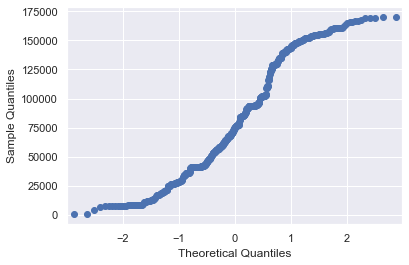

Q-Q plot of feature V1


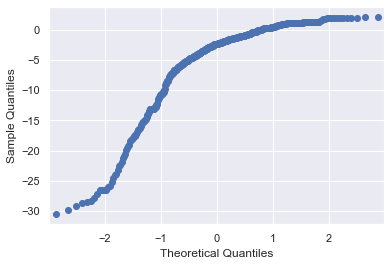

Q-Q plot of feature V2


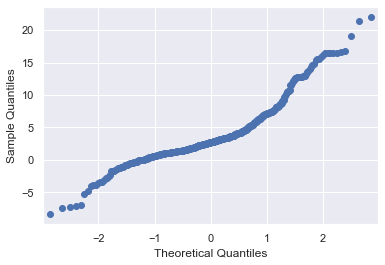

Q-Q plot of feature V3


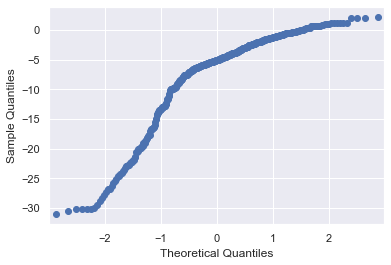

Q-Q plot of feature V4


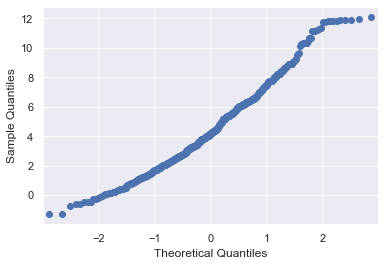

Q-Q plot of feature V5


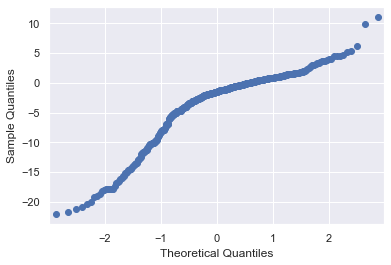

Q-Q plot of feature V6


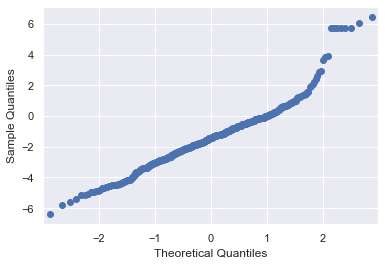

Q-Q plot of feature V7


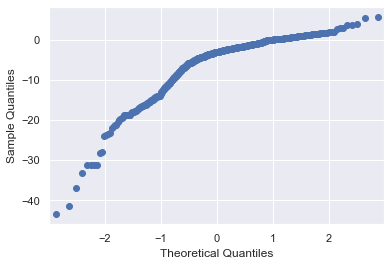

Q-Q plot of feature V8


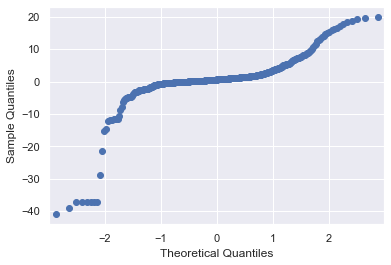

Q-Q plot of feature V9


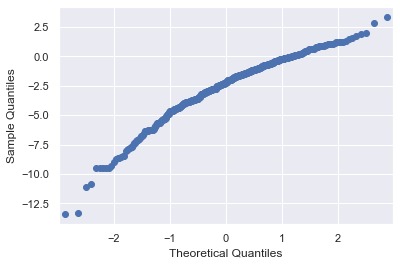

Q-Q plot of feature V10


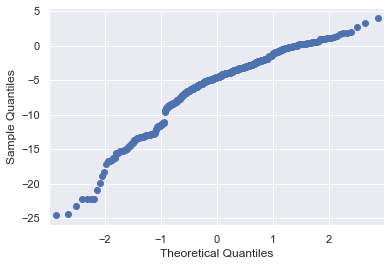

Q-Q plot of feature V11


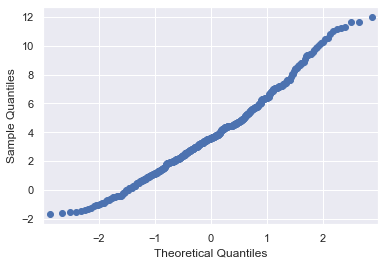

Q-Q plot of feature V12


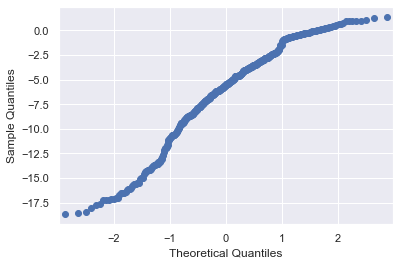

Q-Q plot of feature V13


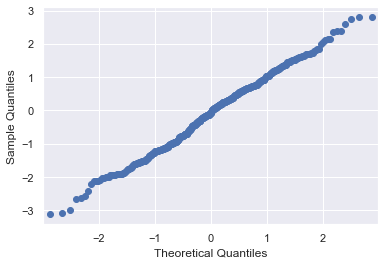

Q-Q plot of feature V14


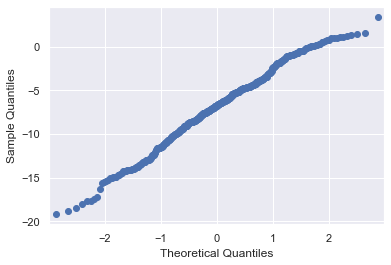

Q-Q plot of feature V15


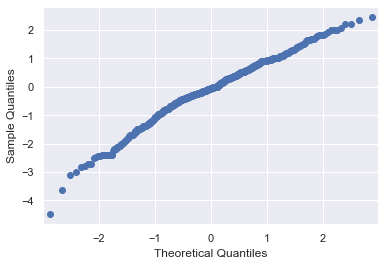

Q-Q plot of feature V16


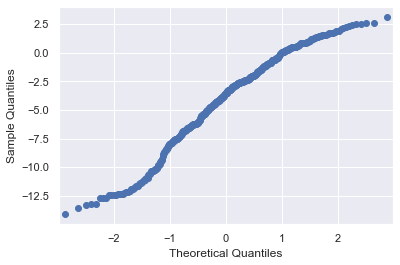

Q-Q plot of feature V17


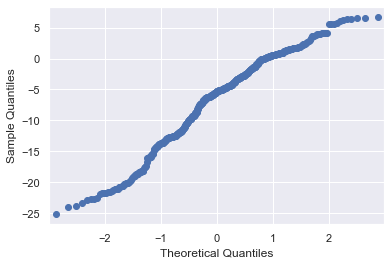

Q-Q plot of feature V18


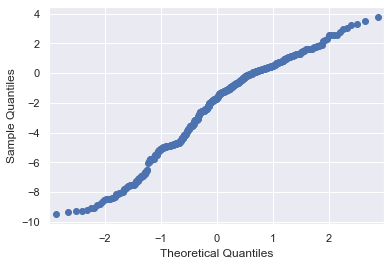

Q-Q plot of feature V19


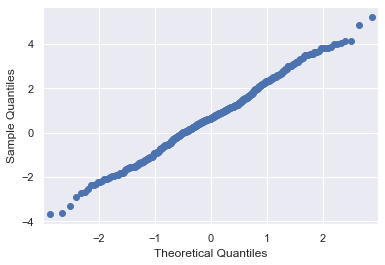

Q-Q plot of feature V20


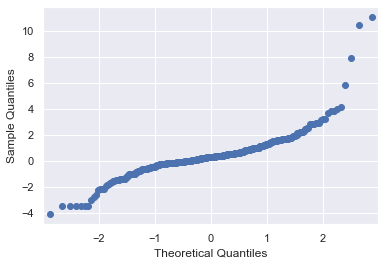

Q-Q plot of feature V21


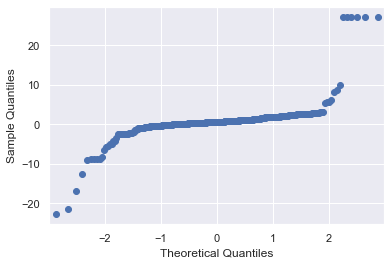

Q-Q plot of feature V22


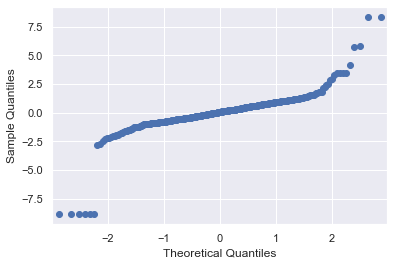

Q-Q plot of feature V23


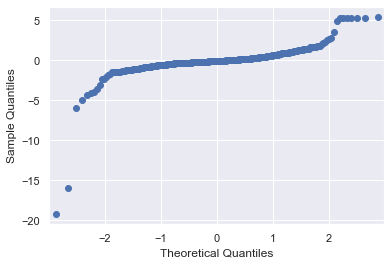

Q-Q plot of feature V24


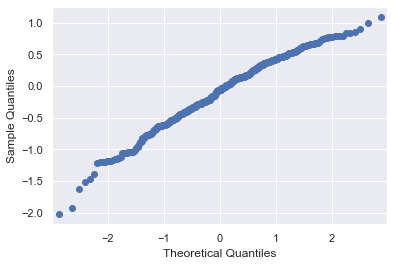

Q-Q plot of feature V25


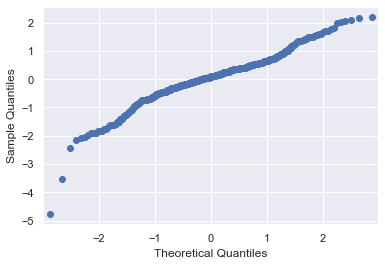

Q-Q plot of feature V26


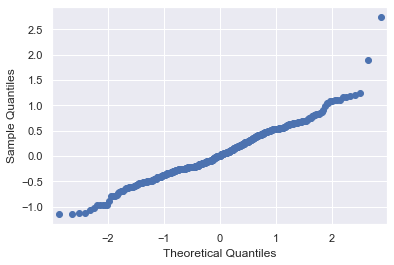

Q-Q plot of feature V27


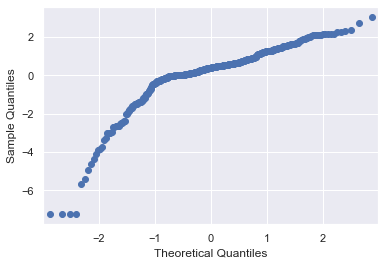

Q-Q plot of feature V28


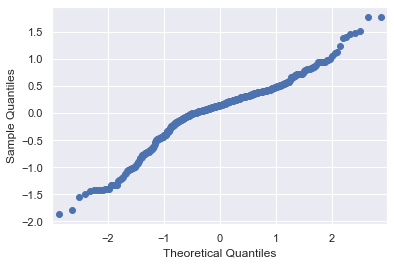

Q-Q plot of feature Amount


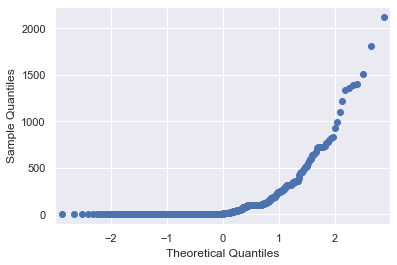

Q-Q plot of feature Class


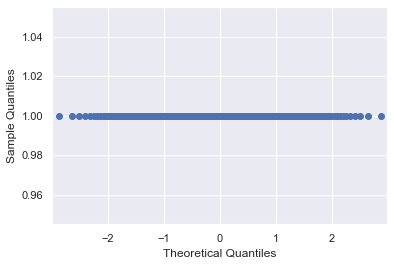

In [150]:
for i in range(df_fraud.shape[1]):
    print("Q-Q plot of feature " + str(df_fraud.columns[i]))
    qq_plot = qqplot(df_fraud.iloc[:,i])
    plt.show()

### 2.8 Histogram_Fit on Time

### 2.8.1 Histogram_Fit on Time of Whole Dataset

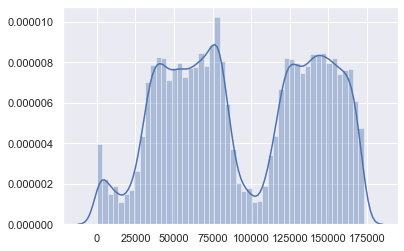

In [64]:
timeseries = df['Time']
time_norm = norm.rvs(timeseries)
sns.distplot(time_norm)
_ = plt.show()

### 2.8.2 Histogram_Fit on Time of Fraud' Dataset

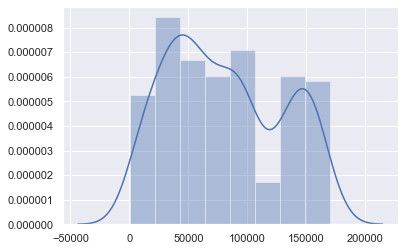

In [135]:
timeseries = df_fraud['Time']
time_norm = norm.rvs(timeseries)
sns.distplot(time_norm)
_ = plt.show()

### 2.9 Histogram_Fit on Amount

### 2.9.1 Histogram_Fit on Amount of Whole dataset

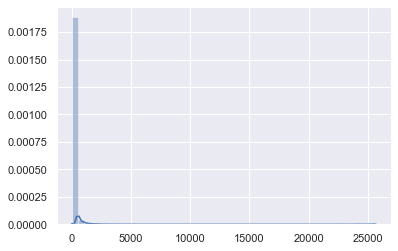

In [70]:
amount_series = df['Amount']
amount_norm = norm.rvs(amount_series)
sns.distplot(amount_norm)
_ = plt.show()

### 2.9.2 Histogram_Fit on Amount of 'Fraud' dataset

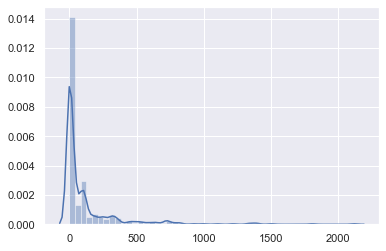

In [132]:
amount_series = df_fraud['Amount']
amount_norm = norm.rvs(amount_series)
sns.distplot(amount_norm)
_ = plt.show()

### 2.10 Histogram on Log (Amount)

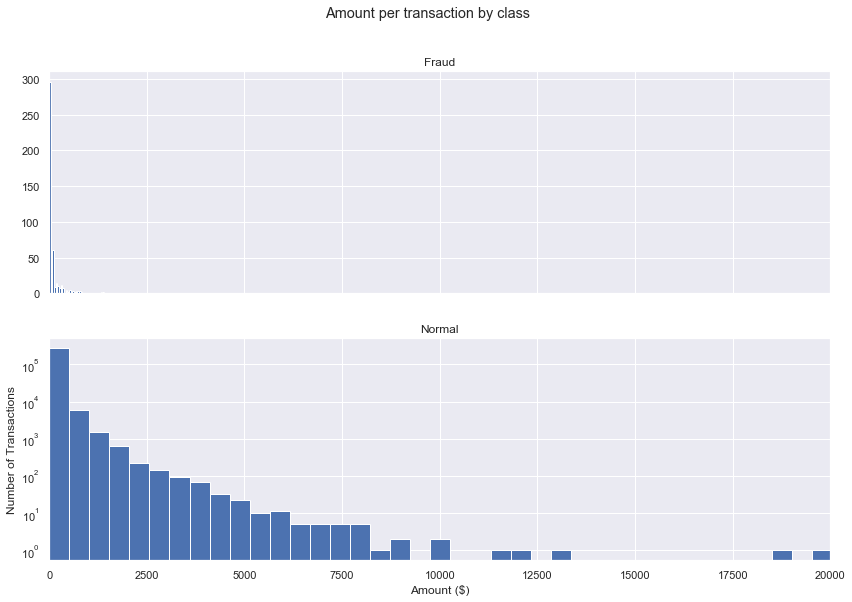

In [161]:
rcParams['figure.figsize'] = 14, 9
figure,(ax1, ax2) = plt.subplots(2, 1, sharex=True)
figure.suptitle('Amount per transaction by class')

bins = 50

ax1.hist(df_fraud.Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(df_normal.Amount, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

### 2.11 ScatterPlot of Amout and Time 

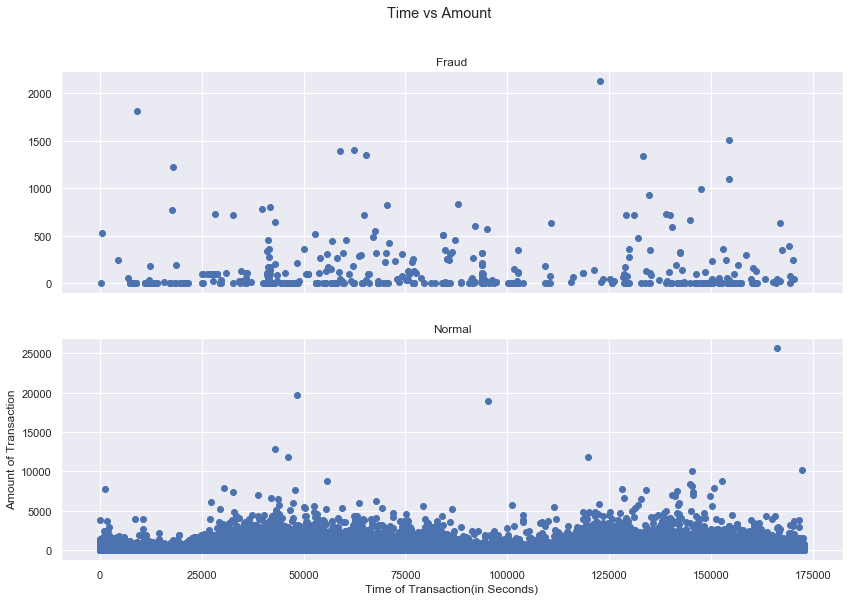

In [164]:
rcParams['figure.figsize'] = 14, 9
figure, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
figure.suptitle('The Scatterplot of Time and Amount')

ax1.scatter(df_fraud.Time, df_fraud.Amount)
ax1.set_title('Fraud')

ax2.scatter(df_normal.Time, df_normal.Amount)
ax2.set_title('Normal')

plt.xlabel('Time of Transaction(in Seconds)')
plt.ylabel('Amount of Transaction')
plt.show()

# 3 Data Preprocessing and Preparing

For the unbalanced problem
We use Resampling to work around it, they are
Oversampling, Undersampling, and Synthetic Sampling.

### 3.1 Robust Scalar

In [489]:
df_s = df
df_s['Amount_Robust'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df_s['Time_Norm'] = RobustScaler().fit_transform(df['Time'].values.reshape(-1,1))
df_s = df_s.drop(['Time','Amount'],axis=1)
df_s.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Amount_Robust,Time_Norm
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [490]:
# Separate input features and target
X = df_s.drop('Class', axis=1)
y = df_s.Class

In [491]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount_Robust,Time_Norm
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,-0.994960


In [492]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [493]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)

In [494]:
#concatenate our training data back together
data_train = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
data_train_normal = data_train[data_train.Class==0]
data_train_fraud = data_train[data_train.Class==1]

### 3.2 Oversampling

In [496]:
# oversample minority
data_train_fraud_oversampled = resample(data_train_fraud,
                          replace=True, # sample with replacement
                          n_samples=len(data_train_normal), # match number in majority class
                          random_state=11) # reproducible results

In [497]:
# combine majority and upsampled minority
data_train_oversampled = pd.concat([data_train_normal, data_train_fraud_oversampled])

In [498]:
data_train_oversampled.Class.value_counts()

1    213246
0    213246
Name: Class, dtype: int64

### 3.3 Undersampling

In [499]:
data_train_normal_undersampled = resample(data_train_normal,
                                replace = False, # sample without replacement
                                n_samples = len(data_train_fraud), # match minority n
                                random_state = 11) # reproducible results

# combine minority and downsampled majority
data_train_undersampled = pd.concat([data_train_normal_undersampled, data_train_fraud])

# checking counts
data_train_undersampled.Class.value_counts()

1    359
0    359
Name: Class, dtype: int64

### 3.4 Synthetic sampling

In [584]:
sm = SMOTE(random_state=13, ratio=1.0)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

In [585]:
y_train_sm.shape

(426492,)

# 4 Model Building Method

In [355]:
model = Sequential([
    Dense(30, activation='relu', input_dim=30),
    Dense(26, activation='relu'),
    Dense(22, activation='relu'),
    Dense(18, activation='relu'),
    Dense(12, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(2, activation='relu'),
    Dense(1, activation='sigmoid'),
])

#rmsprop = RMSprop(lr=0.001)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 5 Model Evalution Method

In [356]:
def generate_auc_roc_curve(model, X_test, y_test):
    y_pred_prob = model.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label='AUC ROC Curve with Area Under the Curve ='+str(auc))
    plt.legend(loc=4)
    plt.xlabel('False Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.show()
    pass

# 6 Experiment on Resampling Techniques

## Conclusion:

## 6.1 Oversampling

In [507]:
#balanced dataset
X_train_oversampled = data_train_oversampled.drop('Class', axis=1)
y_train_oversampled = data_train_oversampled.Class

In [508]:
model = Sequential([
    Dense(30, activation='relu', input_dim=30),
    Dense(26, activation='relu'),
    Dense(22, activation='relu'),
    Dense(18, activation='relu'),
    Dense(12, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(2, activation='relu'),
    Dense(1, activation='sigmoid'),
])

#rmsprop = RMSprop(lr=0.001)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [509]:
model.fit(X_train_oversampled,y_train_oversampled.values.ravel(), epochs=20, batch_size=200)

Epoch 1/20
426492/426492 [==============================] - 5s 11us/step - loss: 0.0316 - accuracy: 0.9899
Epoch 2/20
426492/426492 [==============================] - 4s 9us/step - loss: 0.0068 - accuracy: 0.9986
Epoch 3/20
426492/426492 [==============================] - 3s 8us/step - loss: 0.0050 - accuracy: 0.9990
Epoch 4/20
426492/426492 [==============================] - 4s 9us/step - loss: 0.0043 - accuracy: 0.9992
Epoch 5/20
426492/426492 [==============================] - 4s 9us/step - loss: 0.0042 - accuracy: 0.9991
Epoch 6/20
426492/426492 [==============================] - 3s 8us/step - loss: 0.0033 - accuracy: 0.9994
Epoch 7/20
426492/426492 [==============================] - 4s 10us/step - loss: 0.0031 - accuracy: 0.9994
Epoch 8/20
426492/426492 [==============================] - 4s 10us/step - loss: 0.0025 - accuracy: 0.9995
Epoch 9/20
426492/426492 [==============================] - 5s 12us/step - loss: 0.0028 - accuracy: 0.9995
Epoch 10/20
426492/426492 [===============

In [512]:
y_test_pred = model.predict(X_test)

In [513]:
print(classification_report(y_test, y_test_pred.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71069
           1       0.79      0.85      0.82       133

    accuracy                           1.00     71202
   macro avg       0.89      0.92      0.91     71202
weighted avg       1.00      1.00      1.00     71202



In [514]:
confusion_matrix(y_test, y_test_pred.round())

array([[71039,    30],
       [   20,   113]])

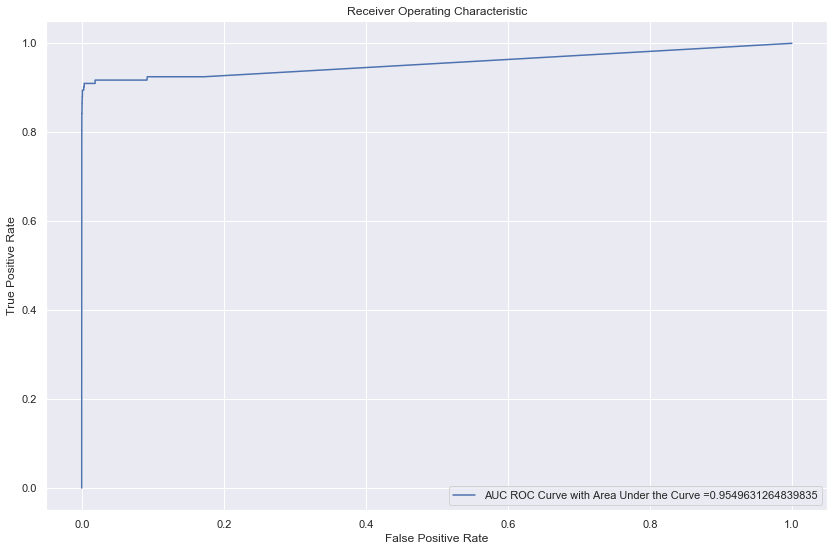

In [515]:
generate_auc_roc_curve(model, X_test, y_test)

## 6.2 Undersampling

In [519]:
#balanced dataset
X_train_undersampled = data_train_undersampled.drop('Class', axis=1)
y_train_undersampled = data_train_undersampled.Class

In [522]:
model = Sequential([
    Dense(30, activation='relu', input_dim=30),
    Dense(26, activation='relu'),
    Dense(22, activation='relu'),
    Dense(18, activation='relu'),
    Dense(12, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(2, activation='relu'),
    Dense(1, activation='sigmoid'),
])

#rmsprop = RMSprop(lr=0.001)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [541]:
model2 = Sequential([
    Dense(30, activation='relu', input_dim=30),
    Dense(1, activation='sigmoid')
])

#rmsprop = RMSprop(lr=0.001)
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [523]:
model.fit(X_train_undersampled,y_train_undersampled.values.ravel(), epochs=120, batch_size=200)

Epoch 1/120
718/718 [==============================] - 0s 388us/step - loss: 0.6504 - accuracy: 0.4819
Epoch 2/120
718/718 [==============================] - 0s 17us/step - loss: 0.5775 - accuracy: 0.5738
Epoch 3/120
718/718 [==============================] - 0s 14us/step - loss: 0.5312 - accuracy: 0.5864
Epoch 4/120
718/718 [==============================] - 0s 24us/step - loss: 0.5006 - accuracy: 0.6281
Epoch 5/120
718/718 [==============================] - 0s 14us/step - loss: 0.4803 - accuracy: 0.7033
Epoch 6/120
718/718 [==============================] - 0s 19us/step - loss: 0.4613 - accuracy: 0.7813
Epoch 7/120
718/718 [==============================] - 0s 17us/step - loss: 0.4478 - accuracy: 0.8343
Epoch 8/120
718/718 [==============================] - 0s 22us/step - loss: 0.4387 - accuracy: 0.8830
Epoch 9/120
718/718 [==============================] - 0s 15us/step - loss: 0.4315 - accuracy: 0.9011
Epoch 10/120
718/718 [==============================] - 0s 20us/step - loss: 0.42

In [542]:
model2.fit(X_train_undersampled,y_train_undersampled.values.ravel(), epochs=120, batch_size=200)

Epoch 1/120
718/718 [==============================] - 0s 164us/step - loss: 0.7428 - accuracy: 0.5515
Epoch 2/120
718/718 [==============================] - 0s 12us/step - loss: 0.6979 - accuracy: 0.5655
Epoch 3/120
718/718 [==============================] - 0s 16us/step - loss: 0.6566 - accuracy: 0.5780
Epoch 4/120
718/718 [==============================] - 0s 17us/step - loss: 0.6176 - accuracy: 0.5808
Epoch 5/120
718/718 [==============================] - 0s 15us/step - loss: 0.5821 - accuracy: 0.5891
Epoch 6/120
718/718 [==============================] - 0s 17us/step - loss: 0.5472 - accuracy: 0.6058
Epoch 7/120
718/718 [==============================] - 0s 11us/step - loss: 0.5161 - accuracy: 0.6267
Epoch 8/120
718/718 [==============================] - 0s 12us/step - loss: 0.4875 - accuracy: 0.6532
Epoch 9/120
718/718 [==============================] - 0s 14us/step - loss: 0.4627 - accuracy: 0.6866
Epoch 10/120
718/718 [==============================] - 0s 16us/step - loss: 0.43

In [524]:
y_test_pred = model.predict(X_test)

In [543]:
y_test_pred2 = model2.predict(X_test)

In [525]:
print(classification_report(y_test, y_test_pred.round()))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     71069
           1       0.02      0.93      0.04       133

    accuracy                           0.91     71202
   macro avg       0.51      0.92      0.49     71202
weighted avg       1.00      0.91      0.95     71202



In [544]:
print(classification_report(y_test, y_test_pred2.round()))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     71069
           1       0.04      0.92      0.08       133

    accuracy                           0.96     71202
   macro avg       0.52      0.94      0.53     71202
weighted avg       1.00      0.96      0.98     71202



In [526]:
confusion_matrix(y_test, y_test_pred.round())

array([[64628,  6441],
       [    9,   124]])

In [545]:
confusion_matrix(y_test, y_test_pred2.round())

array([[68128,  2941],
       [   10,   123]])

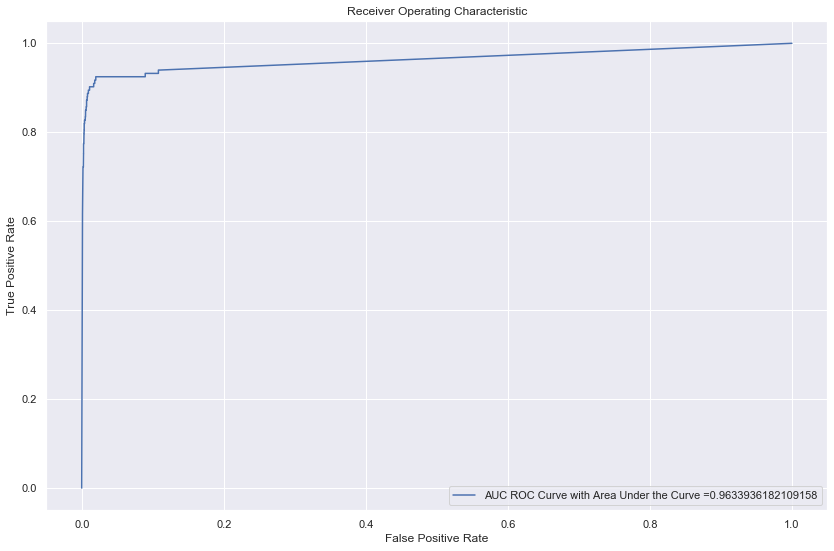

In [527]:
generate_auc_roc_curve(model, X_test, y_test)

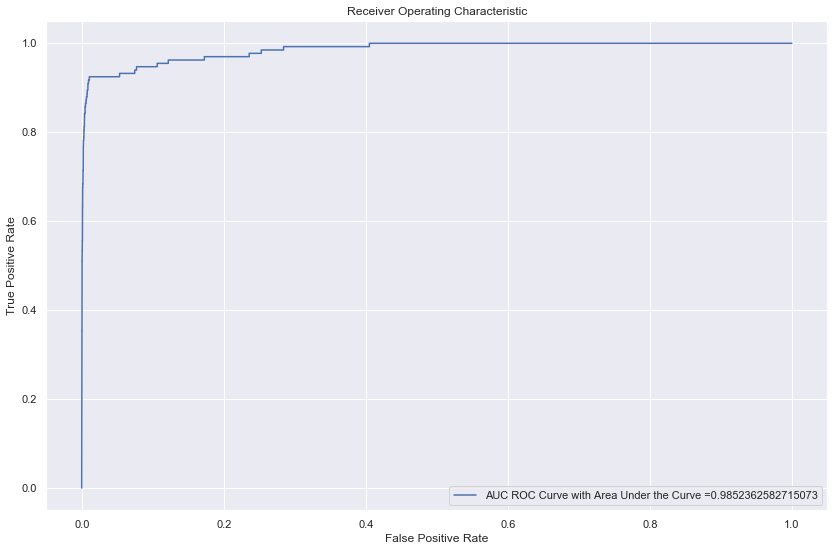

In [546]:
generate_auc_roc_curve(model2, X_test, y_test)

## 6.3 Synthetic sampling

In [592]:
model = Sequential([
    Dense(30, activation='relu', input_dim=30),
    Dense(26, activation='relu'),
    Dense(22, activation='relu'),
    Dense(18, activation='relu'),
    Dense(12, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(2, activation='relu'),
    Dense(1, activation='sigmoid'),
])

#rmsprop = RMSprop(lr=0.001)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [593]:
model.fit(X_train_sm,y_train_sm, epochs=15, batch_size=200)

Epoch 1/15
426492/426492 [==============================] - 4s 9us/step - loss: 0.1938 - accuracy: 0.9853
Epoch 2/15
426492/426492 [==============================] - 3s 8us/step - loss: 0.0532 - accuracy: 0.9978
Epoch 3/15
426492/426492 [==============================] - 4s 9us/step - loss: 0.0217 - accuracy: 0.9985
Epoch 4/15
426492/426492 [==============================] - 4s 9us/step - loss: 0.0108 - accuracy: 0.9989
Epoch 5/15
426492/426492 [==============================] - 4s 10us/step - loss: 0.0065 - accuracy: 0.9991
Epoch 6/15
426492/426492 [==============================] - 5s 13us/step - loss: 0.0043 - accuracy: 0.9993
Epoch 7/15
426492/426492 [==============================] - 5s 11us/step - loss: 0.0037 - accuracy: 0.9993
Epoch 8/15
426492/426492 [==============================] - 4s 10us/step - loss: 0.0031 - accuracy: 0.9995
Epoch 9/15
426492/426492 [==============================] - 4s 10us/step - loss: 0.0027 - accuracy: 0.9995
Epoch 10/15
426492/426492 [==============

In [594]:
y_test_pred = model.predict(X_test)

In [595]:
y_test_pred.round()

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [596]:
print(classification_report(y_test, y_test_pred.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71069
           1       0.72      0.89      0.80       133

    accuracy                           1.00     71202
   macro avg       0.86      0.95      0.90     71202
weighted avg       1.00      1.00      1.00     71202



In [597]:
confusion_matrix(y_test, y_test_pred.round())

array([[71023,    46],
       [   14,   119]])

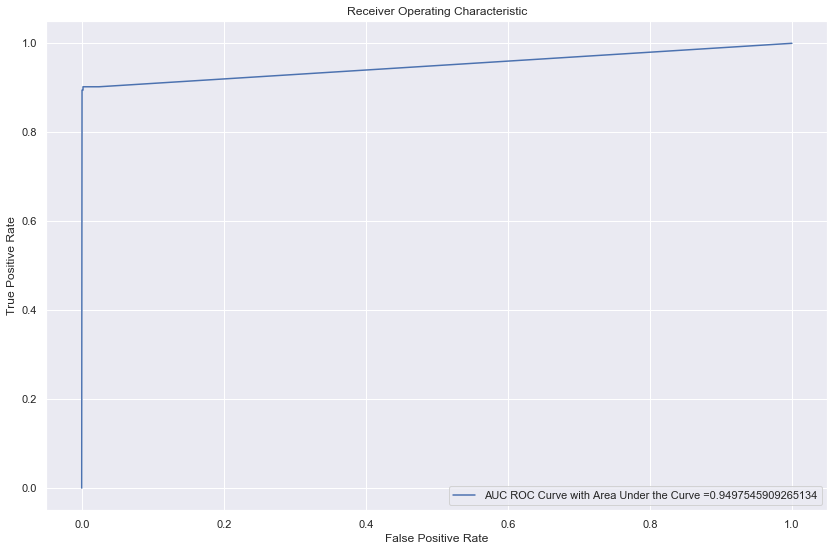

In [598]:
generate_auc_roc_curve(model, X_test, y_test)